# NDVI Analysis 
Kultigin Bozdemir @2020


This is a project for the assignment for Geoinformatics class in Rhein Waal University of Applied Sciences. See [the class repository.]('https://gitlab.spectors.eu/rolf/MIE_2.02_GeoInfo_WS2019/tree/master/gi0000_Final_Assignment')

The assignments is to analyze if there is a correlation between temperature, precipitation and NDVI through the years 2016-2018 in the given polygons in Zanten, Germany. [NDVI]('https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index') shows the healthiness of vegetation. It is said that, Germany suffered a drought in 2018. A [website]('https://www.ufz.de/index.php?en=37937') monitors the drought development in Germany. NDVI analysis can be used to draw conclusion if there is a also an association between drought and NDVI values.

## Relevant Polygons
It must be noted that in the context of this paper, the terms ‘polygons’ and ‘ROI’ will be used interchangeably. The term polygon is used in the software used in this paper QGIS, whereas the term ‘ROI’ was provided in the description of this assignment. They are, however, one and the same. A total of 8 polygons were provided to be researched as part of this assignment. The polygons were downloaded from QGIS using the internal application openstreet map, additionally, Google Maps, and Google Earth were used to better define the features of the provided polygons. The following list will layout the ROIs, their features, and their relevance as can be seen in figure below. <br> <img src="data/ROIs.png">


1. ROI 1: forest area. Trees are resistant to the drought. In such areas, the NDVI values are not prone change when a drought occurs. Therefore, this polygon is not relevant but to ensure the lack of its relevance, it was analyzed.

1. ROI 37: Residential area. It is assumed that the private gardens in this polygon were regularly irrigated and therefore would not follow the same pattern of behavior as other areas which were not irrigated on a regular basis.

1. ROI 30: Xanten archeological park. As a result of a short correspondence (in the data file) with the facility manager and the park, it was determined that these grounds are not regularly irrigated and therefore the behavior of the vegetation in this polygon during the 2018 drought is relevant.

1. ROI 13 & 38: bodies of water, such as small lakes. These are irrelevant to NDVI analysis.

1. ROI 5, 7, 22: Farming fields. As these areas are regularly planted with different kinds of vegetation, maintained and irrigated, it is assumed that they cannot provide meaningful data pertaining to the influence of the drought.

## Getting Satellite Images
We have downloaded the following Sentinel2 (EU satellite) images from the [link.]('https://earthexplorer.usgs.gov/')
<br>
T31UGT_20160610T105032 <br>
T32ULC_20170526T105031 <br>
T31UGT_20180630T105031 <br>
T31UGT_20190627T104029 <br>

After having the images, the images are processed with [Sen2cor]('https://step.esa.int/main/third-party-plugins-2/sen2cor/') software of ESA to do atmospheric corrections. The QGIS files are also in the data file.

## Temperature and Precipitation Data
The second part of data preperation is to collect temperature and precipitation data in the vicinity of Xanten. The sample python codes can be found also in the class [repository]('https://gitlab.spectors.eu/rolf/MIE_2.02_GeoInfo_WS2019'). We have choosen Duisburg and Kleve stations, since Xanten is between two of them and the lanscapes are similar. Only the period from 1th May untill Date of the satellite image is considered as a relevant period. Aggregated daily values of the both precipitation and temperature are repsesented with the mean values.
## NDVI Calculations
The NDVI mean values of each polygon were calculated from four sample dates for each of the four relevant years in QGIS. The raster calculator feature of QGIS allows to calculate the mean of the pixel values, total sum and total count of the pixels.

## NDVI Analysis

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [216]:
#We import generated the NDVI table, which is generated in QGIS
ndvi= pd.read_csv('./data/GroupQ_ROI.csv')

In [217]:
# It was abad idea to give integer names to the polygons.
ndvi['id']=ndvi['id'].astype(str)

In [218]:
# we give new index names
ndvi=ndvi.loc[:, ["id","2016_mean", "2017_mean", "2018_mean","2019_mean" ]]

In [219]:
ndvi.columns=ndvi.columns.str.replace('mean','NDVI',regex=True)

In [220]:
%matplotlib inline

In [221]:
ndvi

,id,2016_NDVI,2017_NDVI,2018_NDVI,2019_NDVI
0,1,0.862303,0.907628,0.897943,0.909397
1,5,0.812900,0.638074,0.394590,0.576419
2,7,0.199090,0.914536,0.285594,0.820480
3,13,0.263674,-0.111733,-0.169371,-0.085833
4,22,0.867378,0.222743,0.546077,0.311782
5,30,0.783765,0.576615,0.462829,0.549113
6,37,0.501425,0.506143,0.479100,0.467512
7,38,0.188714,0.049948,0.016612,-0.093638
8,99,0.662658,0.851958,0.397622,0.677014
9,98,0.720028,0.844098,0.696518,0.780004


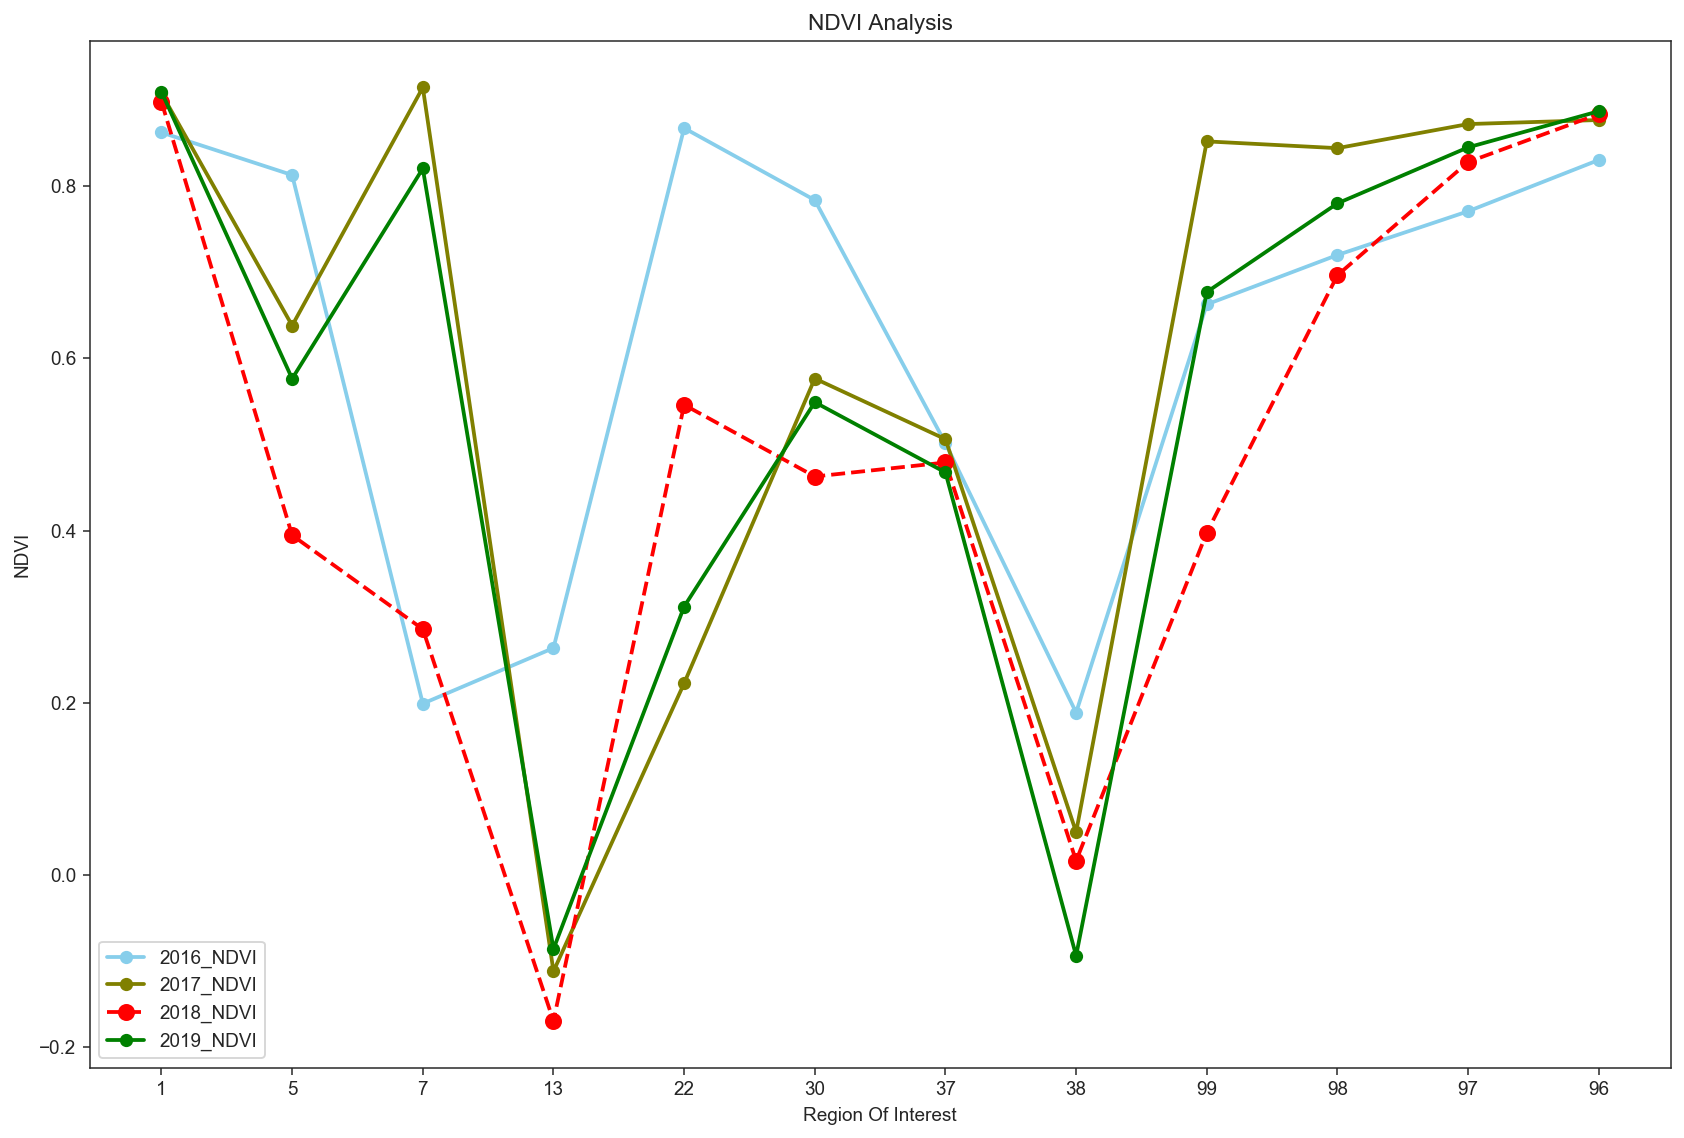

In [222]:
fig = plt.figure(dpi= 136, figsize=(15,10))
N = len(ndvi['id'])
x = np.arange(N)


plt.xticks(x, list(ndvi['id']))
plt.plot(x, '2016_NDVI',  data=ndvi, marker='o', markerfacecolor='skyblue',  color='skyblue', linewidth=2)
plt.plot(x, '2017_NDVI',  data=ndvi, marker='o', color='olive', linewidth=2)
plt.plot( x,'2018_NDVI',  data=ndvi, marker='o', markersize=8,color='red', linewidth=2, linestyle='dashed')
plt.plot(x, '2019_NDVI',  data=ndvi, marker='o', color='green', linewidth=2)
plt.legend()
plt.title('NDVI Analysis')
plt.xlabel('Region Of Interest')
plt.ylabel('NDVI')
plt.show()
fig.savefig('./data/NDVI_plot')

Figure above represents that results that were obtained from NDVI analysis. The red dashed line represents the 2018 NDVI values, in which Germany suffered from a drought. The polygons or ROIs are on the 𝑥 − 𝑎𝑥𝑖𝑠. In the far right and left extremities, polygon 1 and 96 represent the forests.
Values from 2016 differ from other years at ROIs 5, 7, 13, 22, and 30. Similarly, 2018 has some outliers at the polygons of 5 and 7. 2017 and 2019 have very similar patterns. For far right and far left edges, all years have similar values, which are the polygons of 1 and 96. At the first glance, NDVI values might seem to unreliable for different years, whereas there are plausible explanations. Polygons 1 and 96 are forests, where it is expected to observe a stable NDVI value despite the changes in weather. Polygons 5,77 and 22 are farming areas, where different NDVI values might be possible due to different vegetation, which are planted in different years. ROI 13 is the small and shallow lake. As seen in TCI pictures of the Sentinel satellite in different years, the lake varies in size. Consequently, the size of the water body and the grass around it differs respectively. That might be an explanation for the outlier value in 2016 for the polygon 13. Polygon 30 is a field in Xanten archeological park, where some kind of maintenance is expected, despite the email correspondence with the manager of the park, which says there is no regular irrigating for the grass areas, however, it is assumed that other maintenance measures may influence NDVI values for the park (such as: mowing, fertilizing, etc.)

In [223]:
ndvi_trans=ndvi.transpose()
ndvi_trans.columns=ndvi_trans.iloc[0]
ndvi_trans=ndvi_trans.drop(['id'])
ndvi_trans = ndvi_trans.astype(float)
ndvi_trans

id,1,5,7,13,22,30,37,38,99,98,97,96
2016_NDVI,0.862303,0.812900,0.199090,0.263674,0.867378,0.783765,0.501425,0.188714,0.662658,0.720028,0.770815,0.830379
2017_NDVI,0.907628,0.638074,0.914536,-0.111733,0.222743,0.576615,0.506143,0.049948,0.851958,0.844098,0.872073,0.876782
2018_NDVI,0.897943,0.394590,0.285594,-0.169371,0.546077,0.462829,0.479100,0.016612,0.397622,0.696518,0.827966,0.883717
2019_NDVI,0.909397,0.576419,0.820480,-0.085833,0.311782,0.549113,0.467512,-0.093638,0.677014,0.780004,0.845035,0.886961


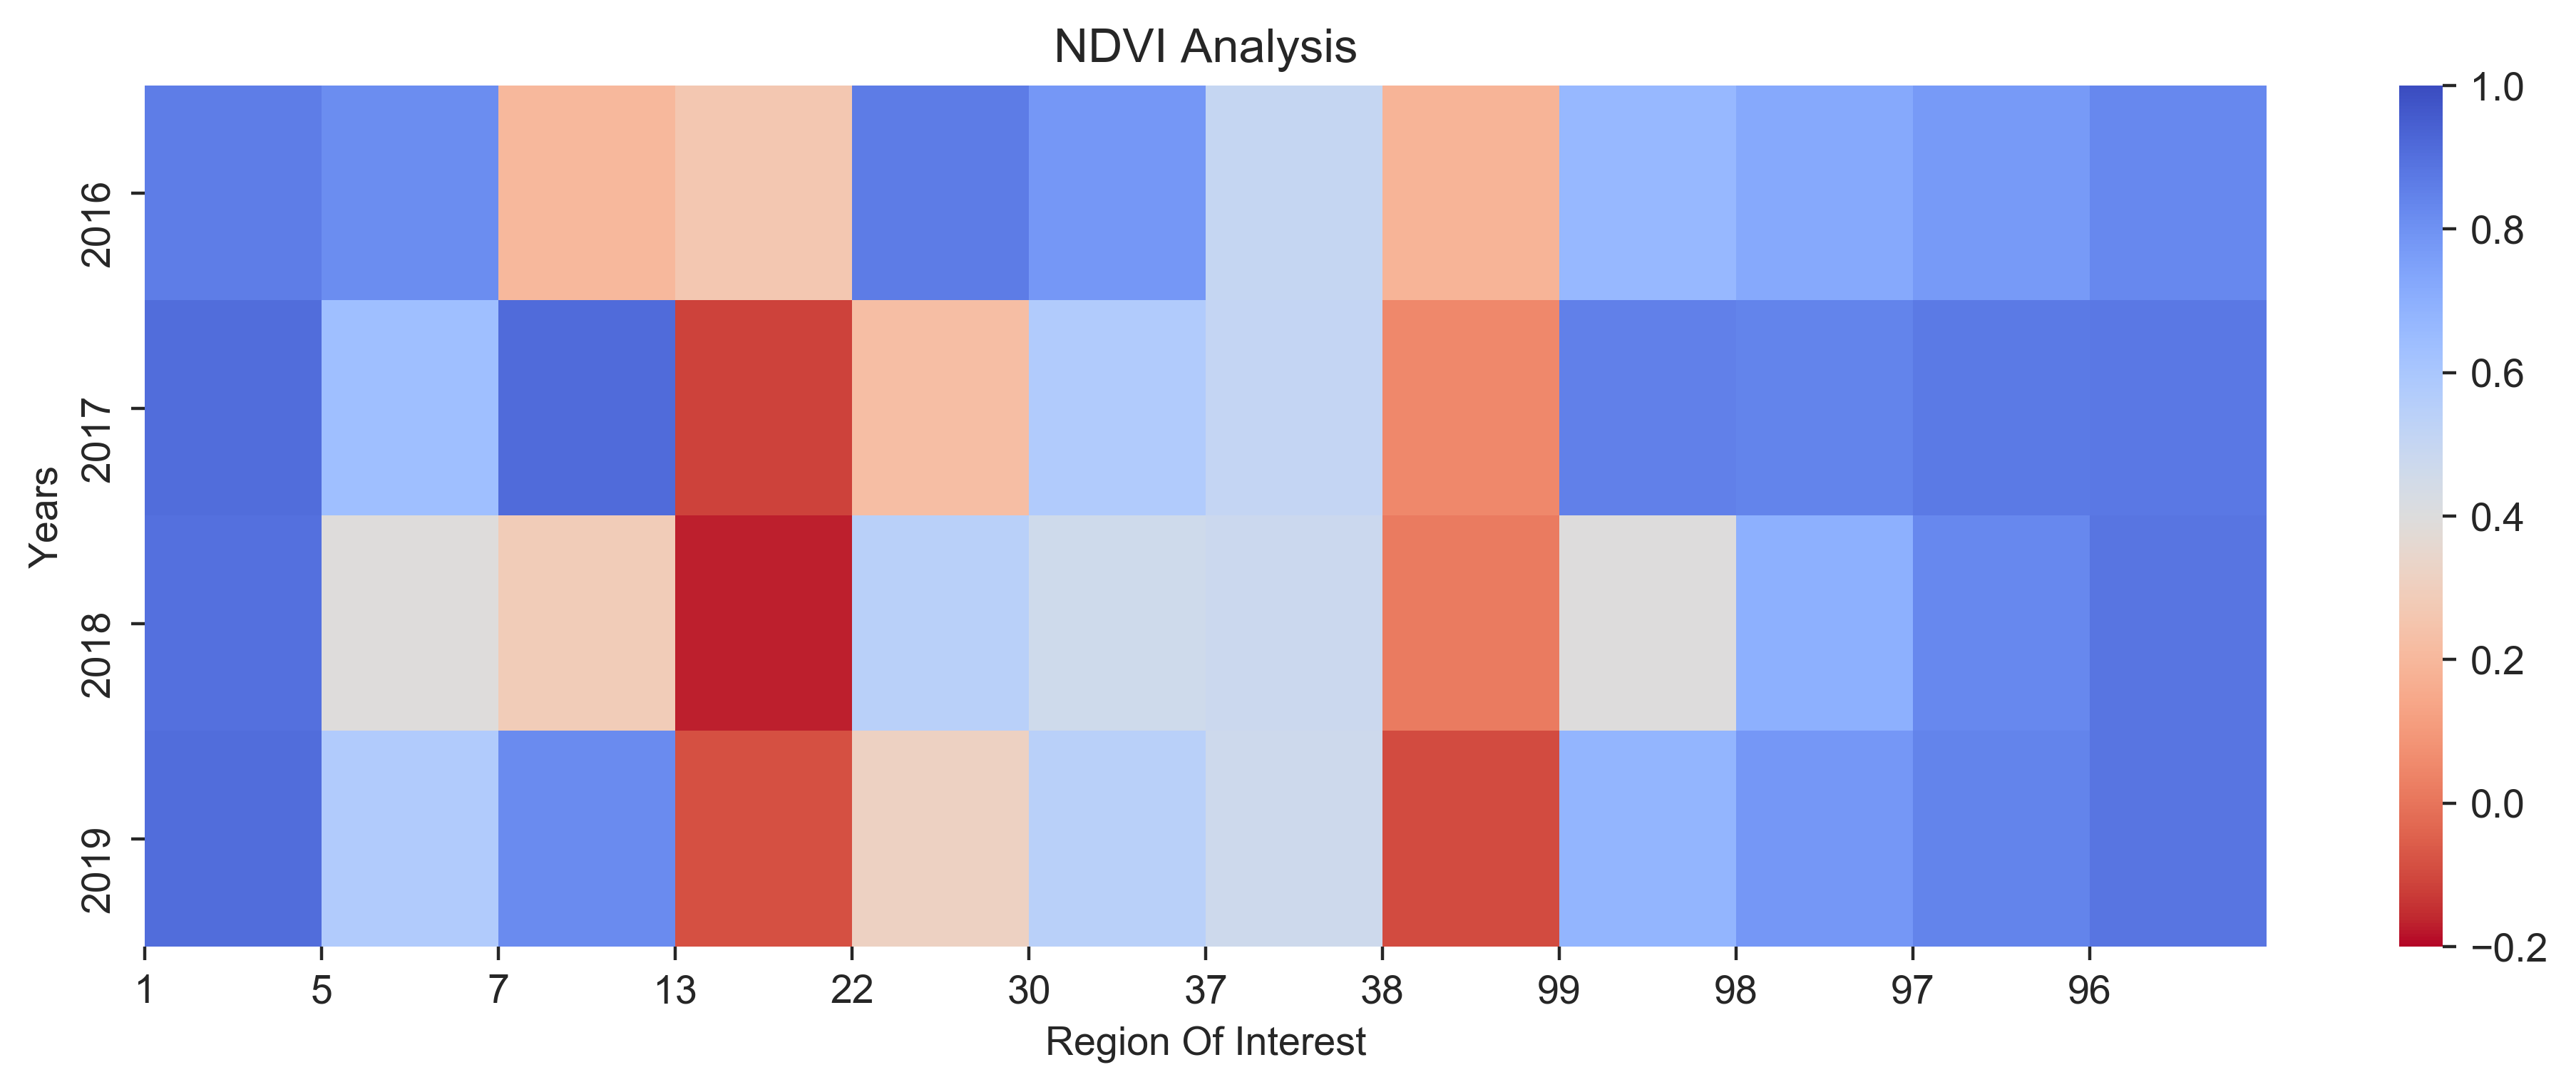

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plot
sns.set_style('ticks')
fig1, ax1 = plt.subplots(dpi = 400, figsize = (12,4))

akws = {"ha": 'center',"va": 'center'}
sns.heatmap(ndvi_trans.values, cmap='coolwarm_r', annot=False,annot_kws=akws, vmin = -0.2, vmax = 1, ax = ax1)

# _r reverses the normal order of the color map 

plt.xticks(x, list(ndvi_trans.columns))
ax1.set_yticklabels(ndvi_trans.index.str[:4])

plt.title('NDVI Analysis')
plt.xlabel('Region Of Interest')
plt.ylabel('Years')
plt.show()
fig1.savefig('./data/ndvi_seaborn.png')

In figure above a heat map of the change in NDVI values throughout the relevant years was plotted to visualize the changes using the Seaborn library. The relevant colors to be observed are to the right of the ROI number on the x-axis. ROIs 13 and 38 are water bodies, which are reddish columns in the graph, no change was expected in these polygons. Polygon 1 and 96 are densely blue, reflecting very slight difference through the years, here as well, little change is observed as these are forest areas. It is seen easily that 2018 NDVI values are lower, that row is more brownish or yellowish, indicating that vegetation was effected by the 2018 drought.

## Reading Temperature and Precipiation

In [225]:
#we read the temperature and precipitation values from csv files, which were created by other python codes.
dbT=pd.read_csv('./data/duisburg_t.csv')
klvT=pd.read_csv('./data/kleve_t.csv')
dbT=dbT.dropna()
klvT=klvT.dropna()

klvP=pd.read_csv('./data/kleve_p.csv')
dbP=pd.read_csv('./data/duisburg_p.csv')
klvP=klvP.dropna()
dbP=klvP.dropna()
klvP=klvP.where(klvP[' RSK']>-1)
dbP=dbP.where(dbP[' RSK']>-1)

In [226]:
max(dbP[' RSK'])

81.9

In [227]:
print('Temperatures of Duisburg station has been from',min(dbT['MESS_DATUM']), 'to',max(dbT['MESS_DATUM']))

Temperatures of Duisburg station has been from 20160501 to 20190627


In [228]:
print(dbT[' TMK'].mean())

16.49454545454545


In [229]:
def temp(date):
    klv=klvT.where((klvT['MESS_DATUM']<date) & (klvT['MESS_DATUM']>=int(str(date)[:4]+'0501')))[' TMK'].mean()
    db=dbT.where((dbT['MESS_DATUM']<date) & (dbT['MESS_DATUM']>=int(str(date)[:4]+'0501')))[' TMK'].mean()
    xanten_temp_mean=(db+klv)/2
    
    klvMax=max(klvT.where((klvT['MESS_DATUM']<date) & (klvT['MESS_DATUM']>=int(str(date)[:4]+'0501')))[' TMK'].dropna())
    dbMax=max(dbT.where((dbT['MESS_DATUM']<date) & (dbT['MESS_DATUM']>=int(str(date)[:4]+'0501')))[' TMK'].dropna())
    xanten_temp_max=(dbMax+klvMax)/2
    
    return(xanten_temp_mean, xanten_temp_max)

In [230]:
def prec (date):
    klv=klvP.where((klvP['MESS_DATUM']<date) & (klvP['MESS_DATUM']>=int(str(date)[:4]+'0501')))[' RSK'].mean()
    #print('kleve prec', date, klv)
    db=dbP.where((dbP['MESS_DATUM']<date) & (dbT['MESS_DATUM']>=int(str(date)[:4]+'0501')))[' RSK'].mean()
    #print('duisburg prec',date, db)
    xanten_prec_mean=(db+klv)/2
    return(xanten_prec_mean)
    

In [231]:
dates=[20160610,20170526,20180630,20190627 ]
weather=dict()
for date in dates:
    key=str(date)
    weather.update({key:{'xanten_temp_mean':temp(date)[0], 'xanten_temp_max':temp(date)[1], 'xanten_prec_mean':prec(date)}})
    #print('temperature', date, temp(date))
    #print('prec', date, prec(date))

In [232]:
weather

{'20160610': {'xanten_temp_mean': 15.989999999999998,
  'xanten_temp_max': 21.8,
  'xanten_prec_mean': 2.4515909090909087},
 '20170526': {'xanten_temp_mean': 14.396000000000003,
  'xanten_temp_max': 23.799999999999997,
  'xanten_prec_mean': 2.0758709677419356},
 '20180630': {'xanten_temp_mean': 17.9625,
  'xanten_temp_max': 23.4,
  'xanten_prec_mean': 3.3355102040816327},
 '20190627': {'xanten_temp_mean': 15.491228070175438,
  'xanten_temp_max': 28.65,
  'xanten_prec_mean': 2.482456140350877}}

In [233]:

temp_mean=list()
temp_max=[]
prec_mean=[]
for k,v in weather.items():
    mean=round(v['xanten_temp_mean'],2)
    temp_mean.append(mean)
    maxx=round(v['xanten_temp_max'],2)
    temp_max.append(maxx)
    prec=round(v['xanten_prec_mean'],5)
    prec_mean.append(prec)


In [234]:
prec_mean

[2.45159, 2.07587, 3.33551, 2.48246]

### Adding Temperature and Precipitation columns into NDVI table

In [235]:
ndvi_trans['temp_max']=temp_max
ndvi_trans['temp_mean']=temp_mean
ndvi_trans['prec_mean']=prec_mean

In [236]:
print(ndvi_trans.columns)
ndvi_trans=ndvi_trans[['temp_max', 'temp_mean', 'prec_mean','1', '5', '7', '13', '22', '30', '37', '38', '99', '98', '97', '96']]

Index(['1', '5', '7', '13', '22', '30', '37', '38', '99', '98', '97', '96',
       'temp_max', 'temp_mean', 'prec_mean'],
      dtype='object', name='id')


In [237]:
ndvi=ndvi_trans.sort_values('temp_mean')
ndvi

id,temp_max,temp_mean,prec_mean,1,5,7,13,22,30,37,38,99,98,97,96
2017_NDVI,23.80,14.40,2.07587,0.907628,0.638074,0.914536,-0.111733,0.222743,0.576615,0.506143,0.049948,0.851958,0.844098,0.872073,0.876782
2019_NDVI,28.65,15.49,2.48246,0.909397,0.576419,0.820480,-0.085833,0.311782,0.549113,0.467512,-0.093638,0.677014,0.780004,0.845035,0.886961
2016_NDVI,21.80,15.99,2.45159,0.862303,0.812900,0.199090,0.263674,0.867378,0.783765,0.501425,0.188714,0.662658,0.720028,0.770815,0.830379
2018_NDVI,23.40,17.96,3.33551,0.897943,0.394590,0.285594,-0.169371,0.546077,0.462829,0.479100,0.016612,0.397622,0.696518,0.827966,0.883717


/Users/kultiginbozdemir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Second argument '1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  if sys.path[0] == '':


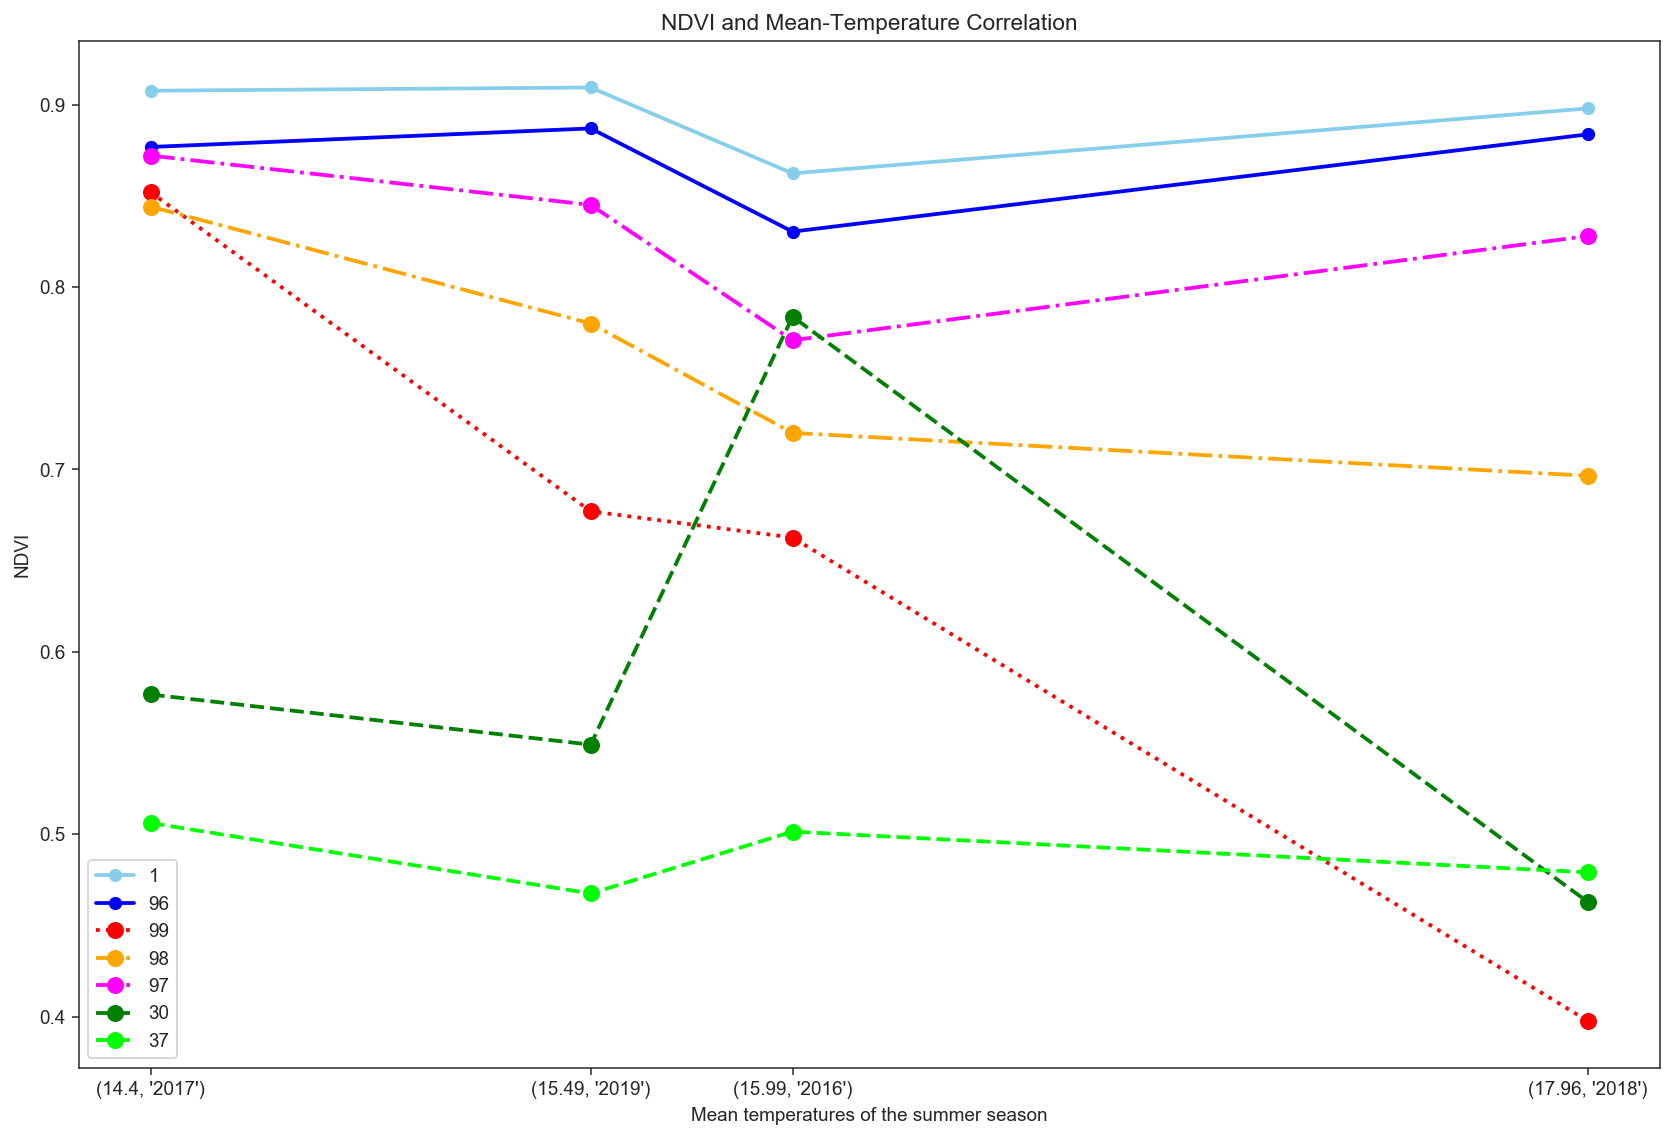

In [238]:

xlabel=[]
for i, row in ndvi.iterrows():
    xlabel.append((row[1], str(i)[:4]))
ndvi=ndvi_trans.sort_values('temp_mean')   

fig = plt.figure(dpi= 136, figsize=(15,10))

x=list(ndvi['temp_mean'])

plt.xticks(x, xlabel)

plt.plot(x, '1',  data=ndvi, marker='o', markerfacecolor='skyblue',  color='skyblue', linewidth=2)
plt.plot(x, '96',  data=ndvi, marker='o', markerfacecolor='blue',color='blue', linewidth=2)
plt.plot(x,'99',  data=ndvi, marker='o', markersize=8, color='red', linewidth=2, linestyle='dotted')
plt.plot(x, '98',  data=ndvi, marker='o', markersize=8, color='orange', linewidth=2,linestyle='dashdot') 
plt.plot(x, '97',  data=ndvi, marker='o', markersize=8, color='magenta', linewidth=2,linestyle='dashdot')
plt.plot(x, '30',  data=ndvi, marker='o', markersize=8, color='green', linewidth=2,linestyle='dashed')
plt.plot(x, '37',  data=ndvi, marker='o', markersize=8, color='#00FF00', linewidth=2,linestyle='dashed')
plt.legend()

plt.title('NDVI and Mean-Temperature Correlation')
plt.xlabel('Mean temperatures of the summer season')
plt.ylabel('NDVI')
plt.show()
fig.savefig('./data/NDVI_temp_mean_plot')

Figure above plots NDVI values against mean temperature of the corresponding summer season. Summer season starts 1st may until the capturing date of the satellite pictures. In the plot, temperature mean values are coupled with corresponding year to give a better understanding to the reader. On the y-axis the NDVI values can be found, whereas on the x-axis the mean temperature and the corresponding year are listed in ascending order, finally, each line represents a different ROI.

The following description is relevant for the following figures. Forest polygons are with solid lines; meadow with dotted lines; unnatural fields with dashed lines; partly brush, partly grass polygons with dash-dotted lines represented.

It is expected that the NDVI will decrease as the temperature increases. 
Forests (ROI 1 and 96) hardly react to temperature as seen on the plot. Namely, they have a stable NDVI pattern. 
99 is the single natural meadow, which has an almost prefect correlation with temperature. 
97, 98 have a pattern, which has a pattern between forest and meadow areas. 
30 is the grass field in Xanten archeological park. A surprising peak at 14.4 degrees is unorthodox, this may be related to maintenance of the park. 
ROI 37 also follows this stable pattern, which is not expected, since the gardens have mostly grass areas. 
The polygons of 13 and 38 will be skipped in the following plots as they are water bodies. Similarly, 5,7 and 22 will be skipped, because they are farming field, whose vegetation development and irrigating activities are unknown. Those have a direct impact on the NDVI values.

## NDVI~Temp-mean Correlation Analysis

In [239]:
import scipy
from scipy import stats
slope=[]
intercept=[]
rvalue=[]
pvalue=[]
stderr=[]

for polygon in list(ndvi.columns):  
    x=ndvi['temp_mean']
    y=ndvi[polygon]
    result=scipy.stats.linregress(x,y)
    slope.append(result.slope)
    intercept.append(result.intercept)
    rvalue.append(result.rvalue)
    pvalue.append(result.pvalue)
    stderr.append(result.stderr)
df=pd.DataFrame(list(zip(slope,intercept,rvalue,pvalue,stderr)), columns=['slope','intercept','rvalue','pvalue','stderr'], index=ndvi.columns)
df=df.transpose()
df.to_csv('./data/Temp_reg_results.csv')
df

id,temp_max,temp_mean,prec_mean,1,5,7,13,22,30,37,38,99,98,97,96
slope,-0.471722,1.000000e+00,0.351512,-0.003240,-0.068027,-0.185585,-0.017458,0.093783,-0.031318,-0.005420,0.000748,-0.125030,-0.040382,-0.011802,0.001156
intercept,31.941186,0.000000e+00,-3.023777,0.946020,1.691205,3.516858,0.252806,-1.009774,1.092912,0.575046,0.028475,2.642799,1.404656,1.017326,0.851009
rvalue,-0.237834,1.000000e+00,0.983146,-0.220033,-0.586932,-0.757957,-0.132579,0.485134,-0.342856,-0.440581,0.009571,-0.993803,-0.910195,-0.410568,0.065229
pvalue,0.762166,1.000000e-20,0.016854,0.779967,0.413068,0.242043,0.867421,0.514866,0.657144,0.559419,0.990429,0.006197,0.089805,0.589432,0.934771
stderr,1.362242,0.000000e+00,0.046221,0.010156,0.066354,0.112936,0.092288,0.119530,0.060675,0.007809,0.055240,0.009889,0.012993,0.018533,0.012505


Although graphs above give an idea about the correlation, linear regression calculations were carried out. The results justify the results what has been visualized in the sections above. 

Instead using only a correlation function, a linear function of python scipy.stats library to see more information about the regarding attributes was used.

Although all relevant information is provided in the tables above, polygon 99 will be emphasized. Because, as seen in the graphs above, NDVI values of forests areas (ROI 1,96) are in varying degrees stable, which provides little benefit to our research question. 

Unnatural fields (ROI 30,37) have proved to deliver unorthodox information to us, but this can explained by the maintenance activities performed on these areas, however detailed information about these activities is beyond the scope of this paper. 

ROIs 97 and 98 exhibit a pattern very close to forest areas, since they are mostly covered with bush or tree type vegetation. Moreover, the correlation between mean temperature and NDVI values of ROIs 97 and 98 must be further elaborated. NDVI values of ROI 98 are less than values of ROI 97 as the mean temperature increases. That is quite understandable, because ROI 98 has more grass covered areas than 97, which can be seen on the first figure above and on google.maps, which shows newly created ROIs.

/Users/kultiginbozdemir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Second argument '1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  del sys.path[0]


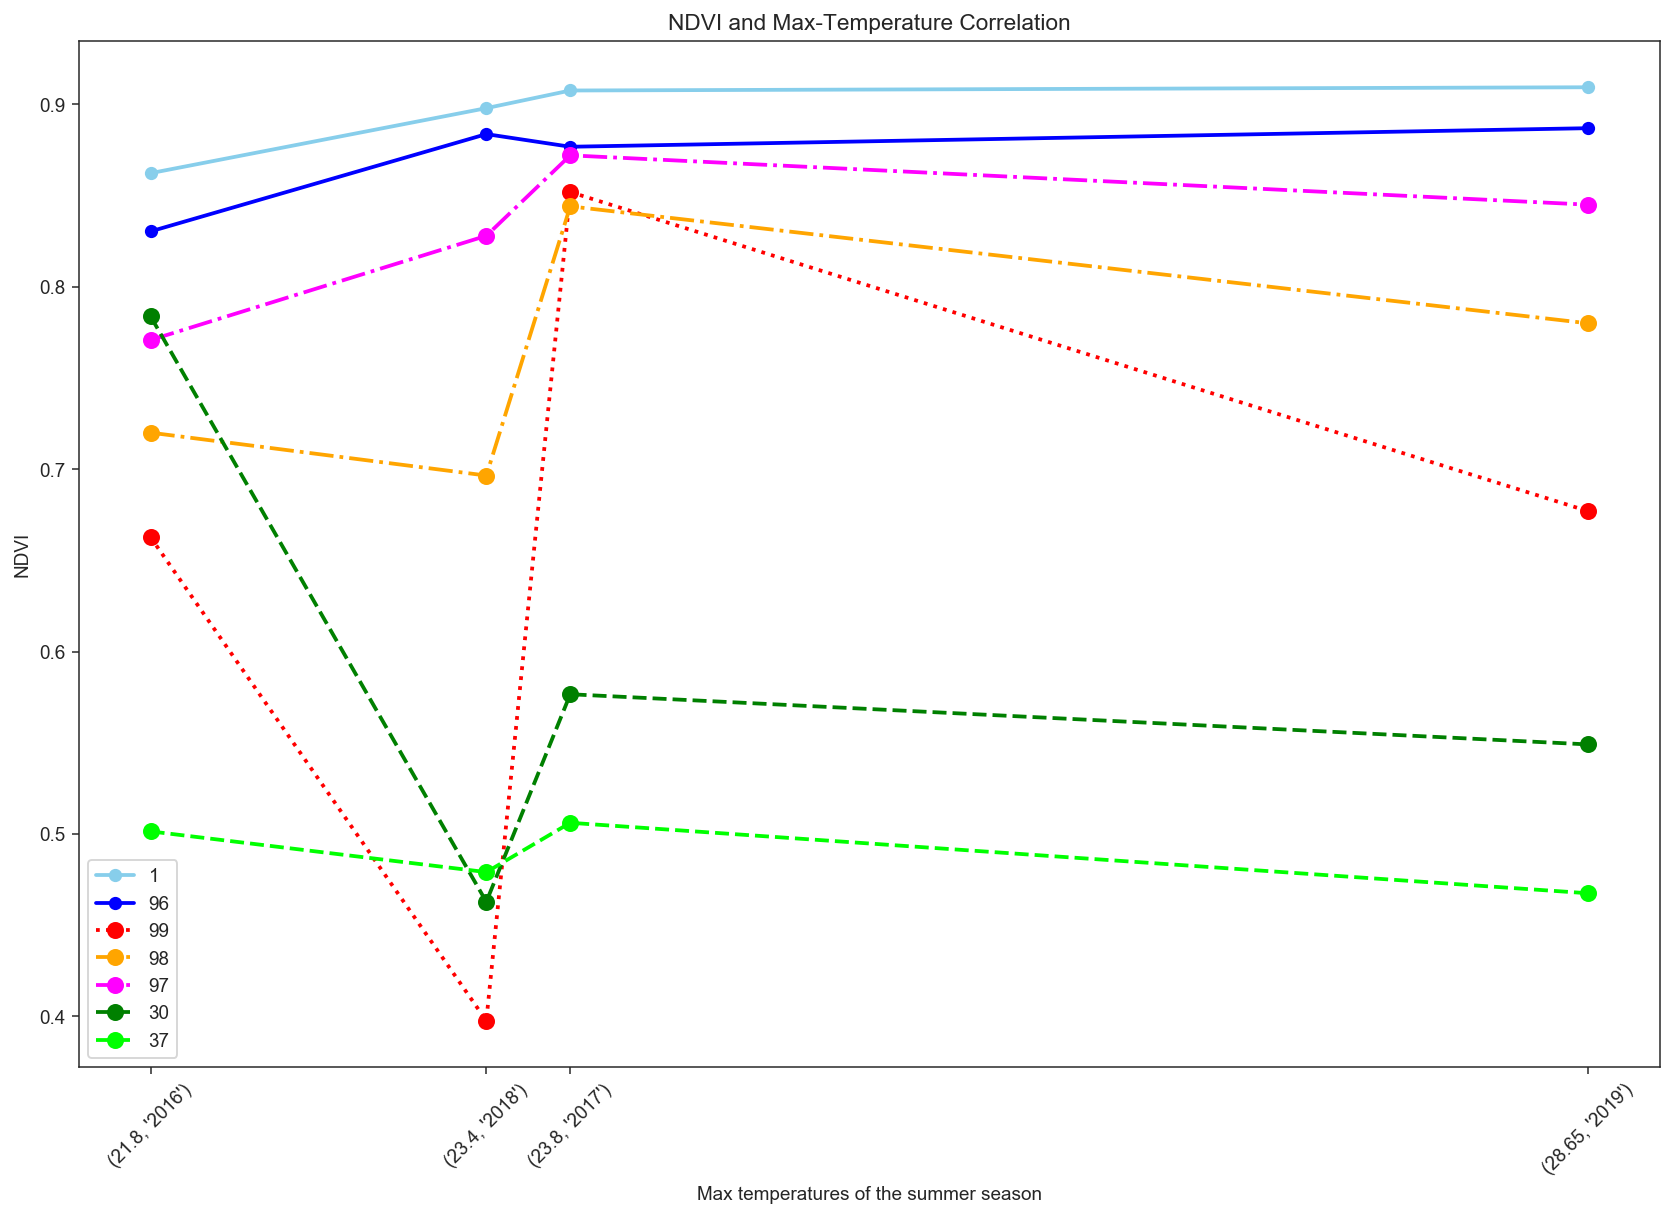

In [240]:
xlabel=[]
ndvi=ndvi_trans.sort_values('temp_max')
for i, row in ndvi.iterrows():
    xlabel.append((row[0], str(i)[:4]))


fig = plt.figure(dpi= 136, figsize=(15,10))

x=list(ndvi['temp_max'])

plt.xticks(x, xlabel, rotation=45)

plt.plot(x, '1',  data=ndvi, marker='o', markerfacecolor='skyblue',  color='skyblue', linewidth=2)
plt.plot(x, '96',  data=ndvi, marker='o', markerfacecolor='blue',color='blue', linewidth=2)
plt.plot(x,'99',  data=ndvi, marker='o', markersize=8, color='red', linewidth=2, linestyle='dotted')
plt.plot(x, '98',  data=ndvi, marker='o', markersize=8, color='orange', linewidth=2,linestyle='dashdot') 
plt.plot(x, '97',  data=ndvi, marker='o', markersize=8, color='magenta', linewidth=2,linestyle='dashdot')
plt.plot(x, '30',  data=ndvi, marker='o', markersize=8, color='green', linewidth=2,linestyle='dashed')
plt.plot(x, '37',  data=ndvi, marker='o', markersize=8, color='#00FF00', linewidth=2,linestyle='dashed')
plt.legend()

plt.title('NDVI and Max-Temperature Correlation')
plt.xlabel('Max temperatures of the summer season')
plt.ylabel('NDVI')
plt.show()
fig.savefig('./data/NDVI_temp_max_plot')

In figure above, the same legend as the one above was followed. However, the maximum daily temperature of the summer season was used. Polygons 1 and 96 are again similar and stable NDVI patterns, but a little increase as max temperature increases, which is unexpected. Besides that, other polygons have much more extreme behavior against the maximum temperature. The NDVI values change significantly, although maximum temperature values of the year 2018 and 2017 are very close to each other. As an initial conclusion, no correlation between max temperature and the NDVI may be expected.

Correlation with maximum temperature can be discarded at this stage, since its plot, the figure above, NDVI~Max-Temp plot provides no meaningful explanation.

### Correlation test with cor function

In [241]:
cor=[]
for polygon in ndvi.columns:
    corr = np.corrcoef(list(ndvi['temp_mean']), list(ndvi[polygon]))
    cor.append(corr[1][0])
    
corDf=pd.DataFrame([cor], columns=list(ndvi.columns))

corDf.rename(index={0:'Corr~Tmean'}, inplace=True)

In [242]:
cor=[]
for polygon in ndvi.columns:
    corr = np.corrcoef(list(ndvi['temp_max']), list(ndvi[polygon]))
    cor.append(corr[1][0])
    
cor=pd.DataFrame([cor], columns=list(ndvi.columns))
corDf=corDf.append(cor)
corDf.rename(index={0:'Corr~Tmax'}, inplace=True)

In [243]:
corDf

,temp_max,temp_mean,prec_mean,1,5,7,13,22,30,37,38,99,98,97,96
Corr~Tmean,-0.237834,1.000000,0.983146,-0.220033,-0.586932,-0.757957,-0.132579,0.485134,-0.342856,-0.440581,0.009571,-0.993803,-0.910195,-0.410568,0.065229
Corr~Tmax,1.000000,-0.237834,-0.113150,0.698298,-0.308155,0.652003,-0.467523,-0.640402,-0.449928,-0.763548,-0.908803,0.128397,0.344848,0.512921,0.672531


In [244]:
corDf.to_csv('./data/Temp_cor.csv', index=False)  

## NDVI~Precipitation Correlation

/Users/kultiginbozdemir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Second argument '1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  if sys.path[0] == '':


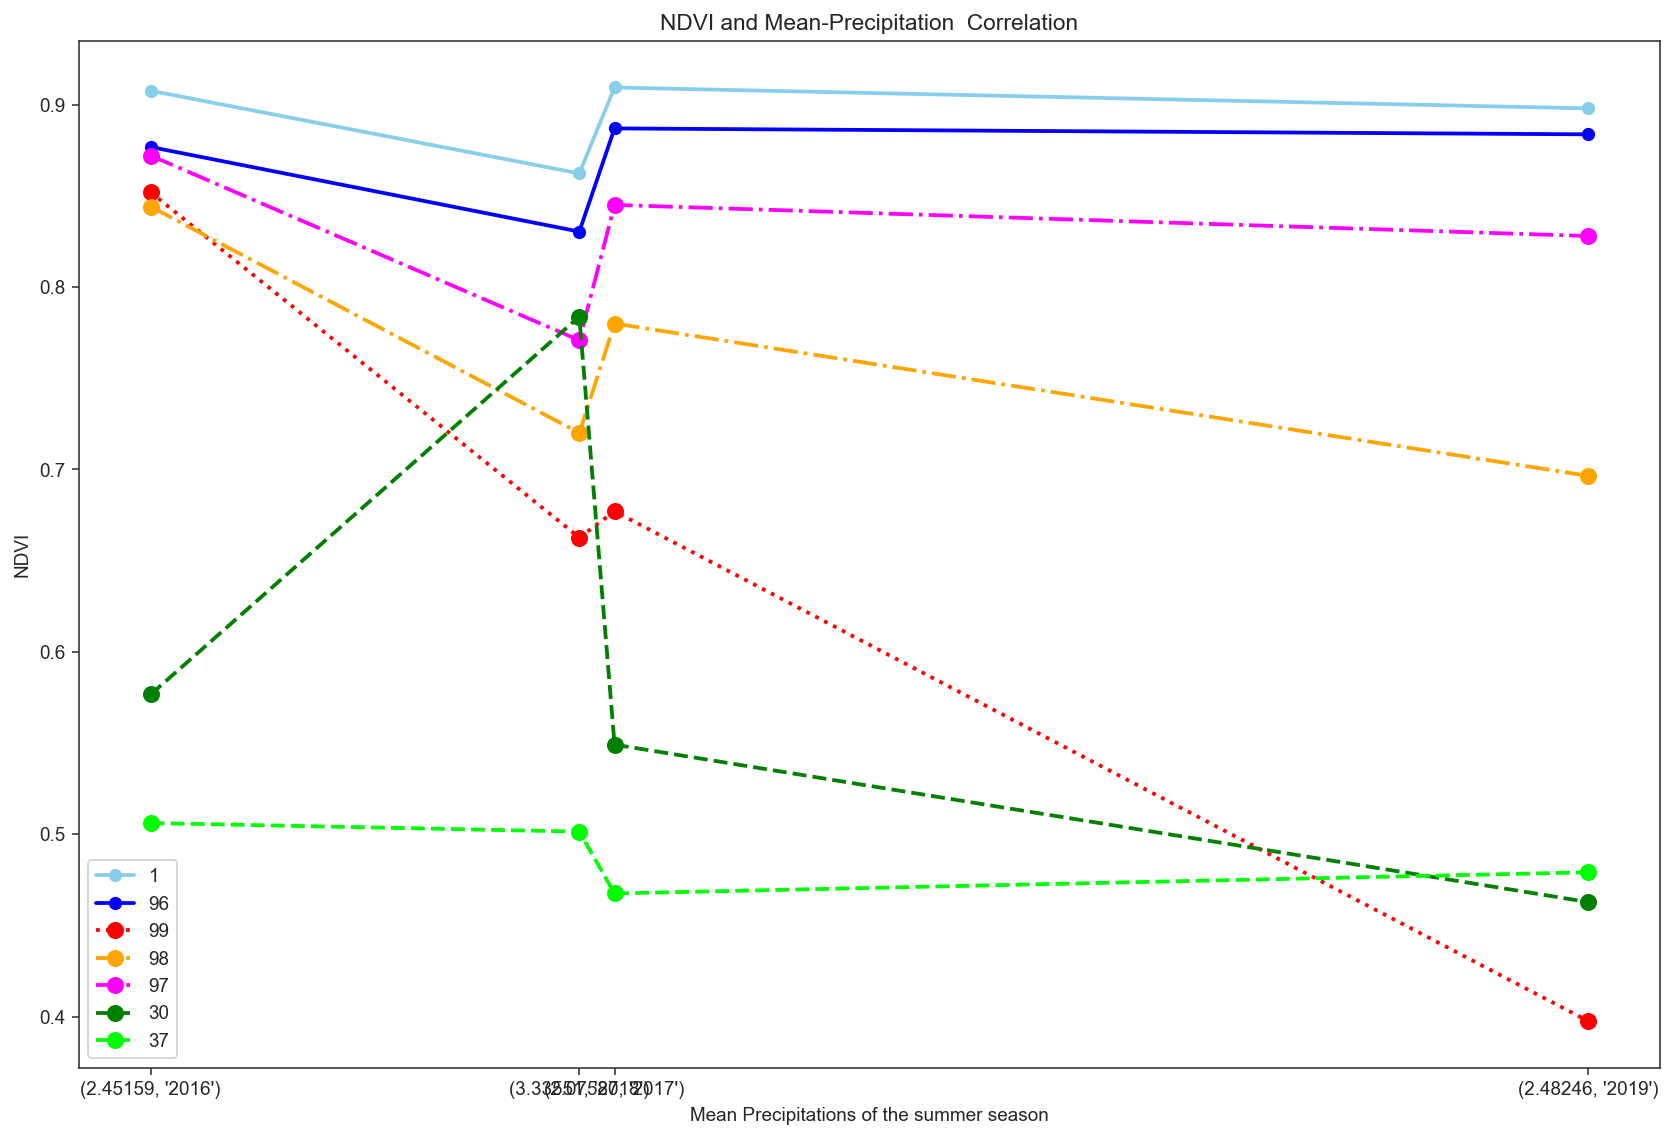

In [245]:
xlabel=[]
for i, row in ndvi.iterrows():
    xlabel.append((row[2], str(i)[:4]))
ndvi=ndvi_trans.sort_values('prec_mean')

fig = plt.figure(dpi= 136, figsize=(15,10))

x=list(ndvi['prec_mean'])

plt.xticks(x, xlabel)

plt.plot(x, '1',  data=ndvi, marker='o', markerfacecolor='skyblue',  color='skyblue', linewidth=2)
plt.plot(x, '96',  data=ndvi, marker='o', markerfacecolor='blue',color='blue', linewidth=2)
plt.plot(x,'99',  data=ndvi, marker='o', markersize=8, color='red', linewidth=2, linestyle='dotted')
plt.plot(x, '98',  data=ndvi, marker='o', markersize=8, color='orange', linewidth=2,linestyle='dashdot') 
plt.plot(x, '97',  data=ndvi, marker='o', markersize=8, color='magenta', linewidth=2,linestyle='dashdot')
plt.plot(x, '30',  data=ndvi, marker='o', markersize=8, color='green', linewidth=2,linestyle='dashed')
plt.plot(x, '37',  data=ndvi, marker='o', markersize=8, color='#00FF00', linewidth=2,linestyle='dashed')
plt.legend()

plt.title('NDVI and Mean-Precipitation  Correlation')
plt.xlabel('Mean Precipitations of the summer season')
plt.ylabel('NDVI')
plt.show()
fig.savefig('./data/NDVI_prec_plot')

Figure above plots the precipitation against NDVI values. It is expected to observe an increase of NDVI values, as the precipitation increases. Polygon 30 seems to display strange behavior. However, ROI 99 is unorthodox as its NDVI value is decreasing as the precipitation increases.

In [246]:
cor=[]
sumSquare=list()
for polygon in ndvi.columns:
    corr = np.corrcoef(list(ndvi['prec_mean']), list(ndvi[polygon]))
    cor.append(corr[1][0])
    sumSquare.append(corr.sum())
    
corP=pd.DataFrame([cor], columns=list(ndvi.columns))

corP.rename(index={0:'Corr~Pmean'}, inplace=True)

In [247]:
corP.to_csv('./data/cor_prec.csv', index=True)
corP

,temp_max,temp_mean,prec_mean,1,5,7,13,22,30,37,38,99,98,97,96
Corr~Pmean,-0.11315,0.983146,1.0,-0.037982,-0.723583,-0.626437,-0.307862,0.31761,-0.507472,-0.533263,-0.154688,-0.991003,-0.825787,-0.242509,0.246403


In [248]:
# Make a regression table for all polygons
import scipy
from scipy import stats
slope=[]
intercept=[]
rvalue=[]
pvalue=[]
stderr=[]

for polygon in list(ndvi.columns):  
    x=ndvi['prec_mean']
    y=ndvi[polygon]
    result=scipy.stats.linregress(x,y)
    slope.append(result.slope)
    intercept.append(result.intercept)
    rvalue.append(result.rvalue)
    pvalue.append(result.pvalue)
    stderr.append(result.stderr)
df=pd.DataFrame(list(zip(slope,intercept,rvalue,pvalue,stderr)), columns=['slope','intercept','rvalue','pvalue','stderr'], index=ndvi.columns)
df=df.transpose()
df.to_csv('./data/Prec_reg_results.csv')
df

id,temp_max,temp_mean,prec_mean,1,5,7,13,22,30,37,38,99,98,97,96
slope,-0.627690,2.749763,1.000000e+00,-0.001564,-0.234563,-0.428995,-0.113382,0.171724,-0.129649,-0.018348,-0.033800,-0.348713,-0.102470,-0.019497,0.012214
intercept,26.035932,8.848129,0.000000e+00,0.898363,1.212158,1.664461,0.267430,0.042855,0.928398,0.535999,0.127828,1.549209,1.025186,0.879398,0.837870
rvalue,-0.113150,0.983146,1.000000e+00,-0.037982,-0.723583,-0.626437,-0.307862,0.317610,-0.507472,-0.533263,-0.154688,-0.991003,-0.825787,-0.242509,0.246403
pvalue,0.886850,0.016854,1.000000e-20,0.962018,0.276417,0.373563,0.692138,0.682390,0.492528,0.466737,0.845312,0.008997,0.174213,0.757491,0.753597
stderr,3.897424,0.361573,0.000000e+00,0.029097,0.158217,0.377451,0.247770,0.362521,0.155661,0.020581,0.152647,0.033301,0.049486,0.055152,0.033970


In the same manner, the results of linear regression between precipitation and NDVI values justify the findings of the graphs above. In polygon 99, the slope is negative, whereas a positive correlation between them was expected. Similarly, ROI 1 and 96 have almost no correlation with the precipitation, similar to the temperature. Apart from ROI 99, all polygons have high p-values (larger than 0.05), which justifies the findings in the plots. Namely, there is no correlation between the NDVI values and precipitation for these polygons. But on the other hand, ROI 99 has a low p-value, however, its slope is negative, as discussed in above.

In [249]:
ndvi

id,temp_max,temp_mean,prec_mean,1,5,7,13,22,30,37,38,99,98,97,96
2017_NDVI,23.80,14.40,2.07587,0.907628,0.638074,0.914536,-0.111733,0.222743,0.576615,0.506143,0.049948,0.851958,0.844098,0.872073,0.876782
2016_NDVI,21.80,15.99,2.45159,0.862303,0.812900,0.199090,0.263674,0.867378,0.783765,0.501425,0.188714,0.662658,0.720028,0.770815,0.830379
2019_NDVI,28.65,15.49,2.48246,0.909397,0.576419,0.820480,-0.085833,0.311782,0.549113,0.467512,-0.093638,0.677014,0.780004,0.845035,0.886961
2018_NDVI,23.40,17.96,3.33551,0.897943,0.394590,0.285594,-0.169371,0.546077,0.462829,0.479100,0.016612,0.397622,0.696518,0.827966,0.883717


## Regression Lines

In [250]:
# Seelct the relevant polygons 
list( list(ndvi.columns)[i] for i in [3,8,9,11,12,13,14] )

['1', '30', '37', '99', '98', '97', '96']

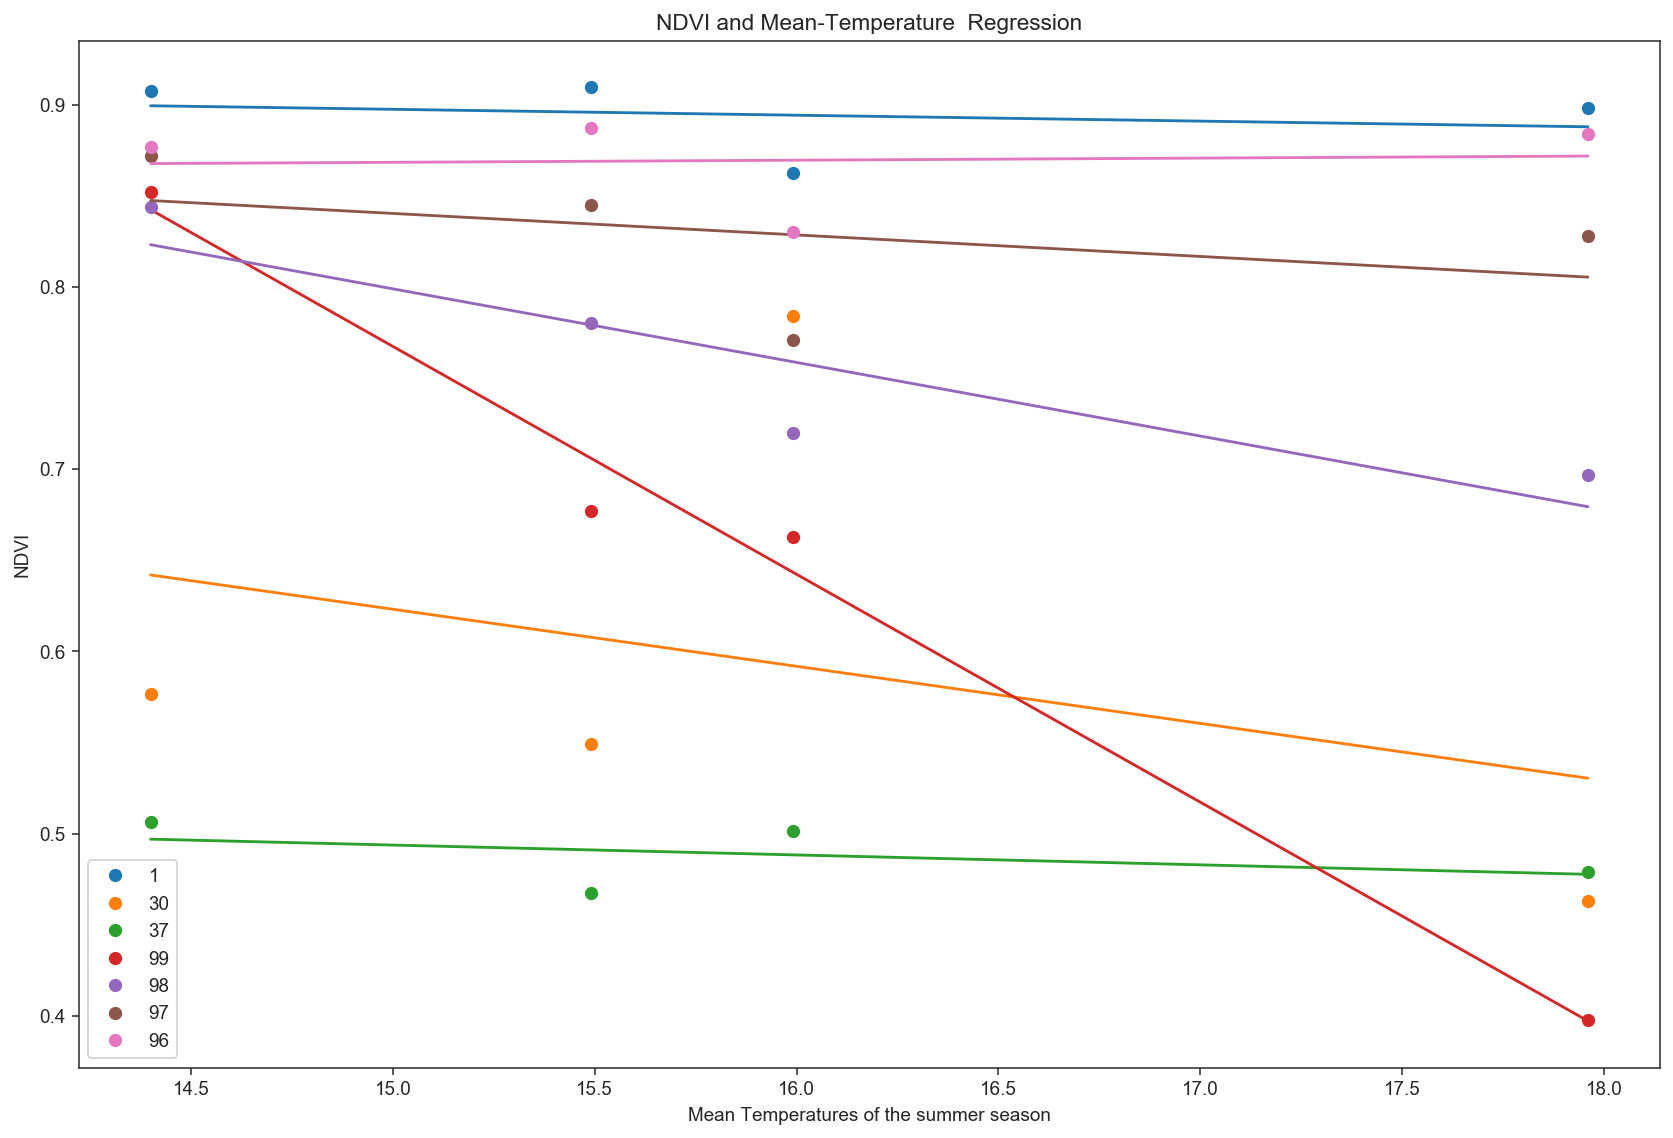

In [251]:
ndvi=ndvi_trans.sort_values('temp_mean') 
ndvi=ndvi.astype(float)

fig = plt.figure(dpi= 136, figsize=(15,10))
ax = plt.gca()


mylist=ndvi.columns

for pol in list( mylist[i] for i in [3,8,9,11,12,13,14] ):
    x=ndvi['temp_mean']
    y=ndvi[pol]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    color = next(ax._get_lines.prop_cycler)['color']  
    plt.plot(x, y,'o', color=color, label=pol)
    plt.plot(x, intercept + slope*x, color=color)
plt.legend()
plt.title('NDVI and Mean-Temperature  Regression')
plt.xlabel('Mean Temperatures of the summer season')
plt.ylabel('NDVI')
plt.show()
fig.savefig('./data/NDVI_temp_mean_reg_plot')


The figure above shows the regression lines calculated above.

## Covariance between NDVI ~ Temperature-mean ~ Temperature-max ~ Precipitation

In [252]:
ndvi

id,temp_max,temp_mean,prec_mean,1,5,7,13,22,30,37,38,99,98,97,96
2017_NDVI,23.80,14.40,2.07587,0.907628,0.638074,0.914536,-0.111733,0.222743,0.576615,0.506143,0.049948,0.851958,0.844098,0.872073,0.876782
2019_NDVI,28.65,15.49,2.48246,0.909397,0.576419,0.820480,-0.085833,0.311782,0.549113,0.467512,-0.093638,0.677014,0.780004,0.845035,0.886961
2016_NDVI,21.80,15.99,2.45159,0.862303,0.812900,0.199090,0.263674,0.867378,0.783765,0.501425,0.188714,0.662658,0.720028,0.770815,0.830379
2018_NDVI,23.40,17.96,3.33551,0.897943,0.394590,0.285594,-0.169371,0.546077,0.462829,0.479100,0.016612,0.397622,0.696518,0.827966,0.883717


In [253]:
df=ndvi.drop(['temp_mean','temp_max', 'prec_mean'], axis=1)
NDVI_all=df.agg("mean", "columns")
NDVI_all.columns=['NDVI_all']
df1=pd.concat([ndvi[['temp_mean','temp_max', 'prec_mean','99']], NDVI_all],axis=1)
df2 = df1.rename({0: 'NDVI_all'}, axis=1)  # rename the mean column
df2

,temp_mean,temp_max,prec_mean,99,NDVI_all
2017_NDVI,14.40,23.80,2.07587,0.851958,0.595739
2019_NDVI,15.49,28.65,2.48246,0.677014,0.553687
2016_NDVI,15.99,21.80,2.45159,0.662658,0.621927
2018_NDVI,17.96,23.40,3.33551,0.397622,0.476600


In [254]:
cov=df2.cov()
cov.to_csv('./data/cov_temp_prec.csv')
cov

,temp_mean,temp_max,prec_mean,99,NDVI_all
temp_mean,2.218467,-1.046500,0.779818,-0.277376,-0.072576
temp_max,-1.046500,8.727292,-0.178010,0.071078,-0.041995
prec_mean,0.779818,-0.178010,0.283595,-0.098893,-0.029471
99,-0.277376,0.071078,-0.098893,0.035114,0.009634
NDVI_all,-0.072576,-0.041995,-0.029471,0.009634,0.004031


Table above is a covariance table which shows the correlation between each pair using the covariance formula from pandas. NDVI_all represents the NDVI mean value of all polygons. Beside that column, polygon 99 is also kept in the table, since it has been explored on the plots above that there is a corelation between mean-temperature and NDVI value of 99. In the table, value of -0.277376 justifies the negative corelation between them. Tehre is no strong correlation between NDVI_all and any other.

Some unorthodox results mentioned before can be seen here as well. For example, a negative correlation between max temperature and temperature mean is not expected. Similarly, mean temperature and mean precipitation have positive correlation, that was supposed to be just the opposite, namely a negative correlation.

##  Conclusion
The analysis should be done in two categories; trees and grasses. Trees are resistant to the changes in the temperature or precipitation henceforth their NDVI values remain stable. On the other hand, grass areas are very prone to effects of the drought as can be seen in the plots above. Trees have long and deep roots to get water to survive even in a drought, whereas grasses have no access to the underground water reservoirs.
There wasn’t a very clear correlation between NDVI and precipitation. A negative correlation emerged when comparing NDVI values to precipitation in the meadow areas.
In regards to the research question and the hypotheses, this research yielded that there is no evident correlation between the three factors (NDVI, AT, CP) respectively, except when considering meadow areas, in which a strong correlation between mean temperature and NDVI is evident.
In this study, only the highest daily temperature in the summer season is defined as the maximum temperature regarding to the temperature-NDVI correlation analysis. For the further studies, a sequence of hot days might be defined as the maximum temperature, which would be feasible. Because, a hot period, like a hot week might harm the vegetation, it is assumed that it might result in a significant decrease of NDVI values.